<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W5_FRI_03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=66483503012c4e596074baf62a3ed6622b0f8075bf296af575c191a727009444
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


4.4223529801543


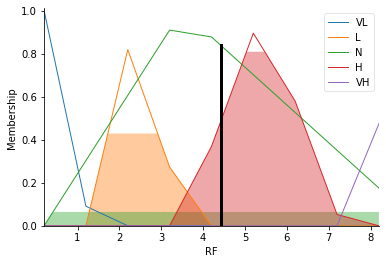

In [ ]:
### Prediction of rainfall using fuzzy logic

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Wind speed (WS)
# Temperature (TP)
# Rainfall (RF)

WS = ctrl.Antecedent(np.arange(0.7,3.2,1),'WS')      # WS: 0.7->3.1 (m/s)
TP = ctrl.Antecedent(np.arange(20.4,41.3,1),'TP')    # TP: 20.4->41.2 (C)
RF = ctrl.Consequent(np.arange(0.2,9.2,1),'RF')      # RF: 0.2->9.1

# Very High (VH)
# High (H)
# Normal (N)
# Low (L)
# Very Low (VL)

WS['VL'] = fuzz.trimf(np.arange(0.7,3.2,1),[0.7,0.7,1.5])
WS['L'] = fuzz.trimf(np.arange(0.7,3.2,1),[1.5,2.3,3])
WS['N'] = fuzz.trimf(np.arange(0.7,3.2,1),[0.7,3,3.2])
WS['H'] = fuzz.trimf(np.arange(0.7,3.2,1),[3,3.03,3.07])
WS['VH'] = fuzz.trimf(np.arange(0.7,3.2,1),[3.07,3.2,3.2])

TP['VL'] = fuzz.trimf(np.arange(20.4,41.3,1),[20.4,20.4,22.7])
TP['L'] = fuzz.trimf(np.arange(20.4,41.3,1),[22.7,25,27.3])
TP['N'] = fuzz.trimf(np.arange(20.4,41.3,1),[20.4,27.3,41.3])
TP['H'] = fuzz.trimf(np.arange(20.4,41.3,1),[27.3,32,36.6])
TP['VH'] = fuzz.trimf(np.arange(20.4,41.3,1),[36.6,41.3,41.3])

RF['VL'] = fuzz.trimf(np.arange(0.2,9.2,1),[0.2,0.2,1.3])
RF['L'] = fuzz.trimf(np.arange(0.2,9.2,1),[1.3,2.4,3.5])
RF['N'] = fuzz.trimf(np.arange(0.2,9.2,1),[0.2,3.5,9.2])
RF['H'] = fuzz.trimf(np.arange(0.2,9.2,1),[3.5,5.4,7.3])
RF['VH'] = fuzz.trimf(np.arange(0.2,9.2,1),[7.3,9.2,9.2])

#----------------------------------------------------------------------
#(1)
rule1 = ctrl.Rule(WS['VH'] & TP['VL'],RF['N'])
rule2 = ctrl.Rule(WS['VH'] & TP['L'],RF['H'])
rule3 = ctrl.Rule(WS['VH'] & TP['N'],RF['VH'])
rule4 = ctrl.Rule(WS['VH'] & TP['H'],RF['VH'])
rule5 = ctrl.Rule(WS['VH'] & TP['VH'],RF['VH'])
#(2)
rule6 = ctrl.Rule(WS['H'] & TP['VL'],RF['N'])
rule7 = ctrl.Rule(WS['H'] & TP['L'],RF['H'])
rule8 = ctrl.Rule(WS['H'] & TP['N'],RF['VH'])
rule9 = ctrl.Rule(WS['H'] & TP['H'],RF['VH'])
rule10 = ctrl.Rule(WS['H'] & TP['VH'],RF['H'])
#(3)
rule11 = ctrl.Rule(WS['N'] & TP['VL'],RF['L'])
rule12 = ctrl.Rule(WS['N'] & TP['L'],RF['L'])
rule13 = ctrl.Rule(WS['N'] & TP['N'],RF['N'])
rule14 = ctrl.Rule(WS['N'] & TP['H'],RF['H'])
rule15 = ctrl.Rule(WS['N'] & TP['VH'],RF['H'])
#(4)
rule16 = ctrl.Rule(WS['L'] & TP['VL'],RF['VL'])
rule17 = ctrl.Rule(WS['L'] & TP['L'],RF['VL'])
rule18 = ctrl.Rule(WS['L'] & TP['N'],RF['L'])
rule19 = ctrl.Rule(WS['L'] & TP['H'],RF['N'])
rule20 = ctrl.Rule(WS['L'] & TP['VH'],RF['L'])
#(5)
rule21 = ctrl.Rule(WS['VL'] & TP['VL'],RF['VL'])
rule22 = ctrl.Rule(WS['VL'] & TP['L'],RF['VL'])
rule23 = ctrl.Rule(WS['VL'] & TP['N'],RF['VL'])
rule24 = ctrl.Rule(WS['VL'] & TP['H'],RF['N'])
rule25 = ctrl.Rule(WS['VL'] & TP['VH'],RF['L'])
#----------------------------------------------------------------------
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                   rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['WS'] = 3.09        ## 0.7->3.1 (m/s)
tipping.input['TP'] = 41.1       ## 20.4->41.2 (C)    
tipping.compute()
print(tipping.output['RF'])   ## 0.2->9.1 (mm)
RF.view(sim = tipping)